# India have enough testing labs?

To Answer this Question we need to work on different data sets lets work onit and see

Import required python modules which are helpful to analyze the data

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

lets read data set related to day wise cases

In [2]:
#Reading Data set related to ICMR Testing labs
df = pd.read_csv('ICMRTestingLabs.csv', encoding='latin-1')
df.head()

,Lab,Address,Pincode,City,State,Type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


Lets see lab couts based on State from above data sets

In [3]:
#creating new variable called lab_counts which houlds state wise counts
lab_counts = df.State.value_counts()
lab_counts.head()

Maharashtra    39
Tamil Nadu     26
Telangana      19
Delhi          18
Karnataka      17
Name: State, dtype: int64

Lets Create a bar chart to see the values for state wise

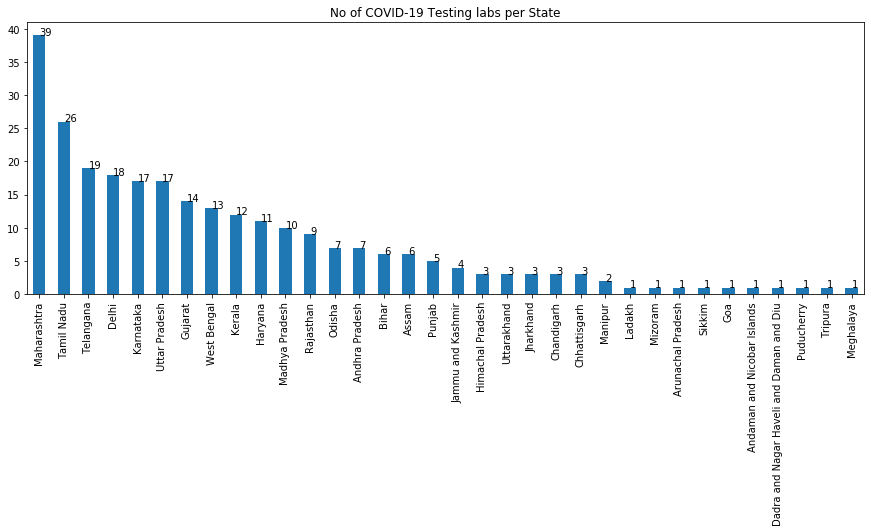

In [4]:
#Creating bar char for by using above variable
lab_counts.plot.bar(rot=90, title='No of COVID-19 Testing labs per State', figsize=(15, 5))

#For loop to get the values for each bar
for index, value in enumerate(lab_counts):
    plt.text(index, value, str(value))

Lets check for state wise testing

Lets read respective data set

In [5]:
# Reading data related to testing state wise
df = pd.read_csv("StatewiseTestingDetails.csv")  
df.head()

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,1210,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0


lets check state wise total samples for each month

In [6]:
#Creating a new column called YearMonth
df['Month'] = pd.DatetimeIndex(df['Date'],dayfirst=True,).month 
df['Year'] = pd.DatetimeIndex(df['Date'],dayfirst=True,).year
df['YearMonth'] = df['Year'].astype(str)+'-'+df['Month'].astype(str)

df

,Date,State,TotalSamples,Negative,Positive,Month,Year,YearMonth
0,17/04/2020,Andaman and Nicobar Islands,1403,1210,12.0,4,2020,2020-4
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0,4,2020,2020-4
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0,4,2020,2020-4
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0,5,2020,2020-5
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0,5,2020,2020-5
...,...,...,...,...,...,...,...,...
5766,26/09/2020,West Bengal,3055039,NaN,NaN,9,2020,2020-9
5767,27/09/2020,West Bengal,3098657,NaN,NaN,9,2020,2020-9
5768,28/09/2020,West Bengal,3139938,NaN,NaN,9,2020,2020-9
5769,29/09/2020,West Bengal,3183697,NaN,NaN,9,2020,2020-9


In [8]:
#lets Pivote the data set
df = pd.pivot_table(df, values='TotalSamples', index=['YearMonth'],
                    columns=['State'], aggfunc=np.sum)
df

State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
YearMonth,,,,,,,,,,,,,,,,,,,,,
2020-4,6930.0,819015.0,6271.0,84612.0,273246.0,11634.0,188583.0,15271.0,541924.0,17113.0,...,22360.0,199423.0,1302400.0,NaN,1122260.0,53303.0,7656.0,826610.0,82759.0,153119.0
2020-5,106231.0,6947640.0,110479.0,1038938.0,1322890.0,86508.0,956931.0,191404.0,3921639.0,249656.0,...,158101.0,1603216.0,7309683.0,31876.0,9672303.0,23388.0,433956.0,5366214.0,462667.0,2792015.0
2020-6,351040.0,17941804.0,468969.0,6212049.0,4112686.0,178717.0,3366037.0,579383.0,9972589.0,1306691.0,...,335736.0,5836574.0,18672249.0,198361.0,23445380.0,924132.0,1409725.0,14670740.0,1459303.0,10482353.0
2020-7,607579.0,40729796.0,1296620.0,18794162.0,11129288.0,325319.0,7237236.0,1047685.0,24551654.0,3121066.0,...,891940.0,13520674.0,35954892.0,471388.0,57124756.0,6981058.0,3233047.0,42883041.0,3446465.0,20931361.0
2020-8,889807.0,88689222.0,3901812.0,51503857.0,54096607.0,666528.0,13445035.0,1497849.0,40535918.0,5127596.0,...,1757977.0,24586254.0,59666436.0,974674.0,115434562.0,24765958.0,6663827.0,111492454.0,8240087.0,41681715.0
2020-9,1418271.0,143345158.0,6332338.0,84228128.0,157148977.0,1619986.0,25297099.0,1606117.0,68841611.0,6871777.0,...,3692034.0,43610400.0,81815834.0,1375694.0,183053990.0,67042651.0,10068361.0,236747961.0,16633577.0,77493556.0


In [9]:
#Lets fill 0 values for null values
df = df.fillna(0)
df

State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
YearMonth,,,,,,,,,,,,,,,,,,,,,
2020-4,6930.0,819015.0,6271.0,84612.0,273246.0,11634.0,188583.0,15271.0,541924.0,17113.0,...,22360.0,199423.0,1302400.0,0.0,1122260.0,53303.0,7656.0,826610.0,82759.0,153119.0
2020-5,106231.0,6947640.0,110479.0,1038938.0,1322890.0,86508.0,956931.0,191404.0,3921639.0,249656.0,...,158101.0,1603216.0,7309683.0,31876.0,9672303.0,23388.0,433956.0,5366214.0,462667.0,2792015.0
2020-6,351040.0,17941804.0,468969.0,6212049.0,4112686.0,178717.0,3366037.0,579383.0,9972589.0,1306691.0,...,335736.0,5836574.0,18672249.0,198361.0,23445380.0,924132.0,1409725.0,14670740.0,1459303.0,10482353.0
2020-7,607579.0,40729796.0,1296620.0,18794162.0,11129288.0,325319.0,7237236.0,1047685.0,24551654.0,3121066.0,...,891940.0,13520674.0,35954892.0,471388.0,57124756.0,6981058.0,3233047.0,42883041.0,3446465.0,20931361.0
2020-8,889807.0,88689222.0,3901812.0,51503857.0,54096607.0,666528.0,13445035.0,1497849.0,40535918.0,5127596.0,...,1757977.0,24586254.0,59666436.0,974674.0,115434562.0,24765958.0,6663827.0,111492454.0,8240087.0,41681715.0
2020-9,1418271.0,143345158.0,6332338.0,84228128.0,157148977.0,1619986.0,25297099.0,1606117.0,68841611.0,6871777.0,...,3692034.0,43610400.0,81815834.0,1375694.0,183053990.0,67042651.0,10068361.0,236747961.0,16633577.0,77493556.0


Lets create lone chart to see stat wise testing

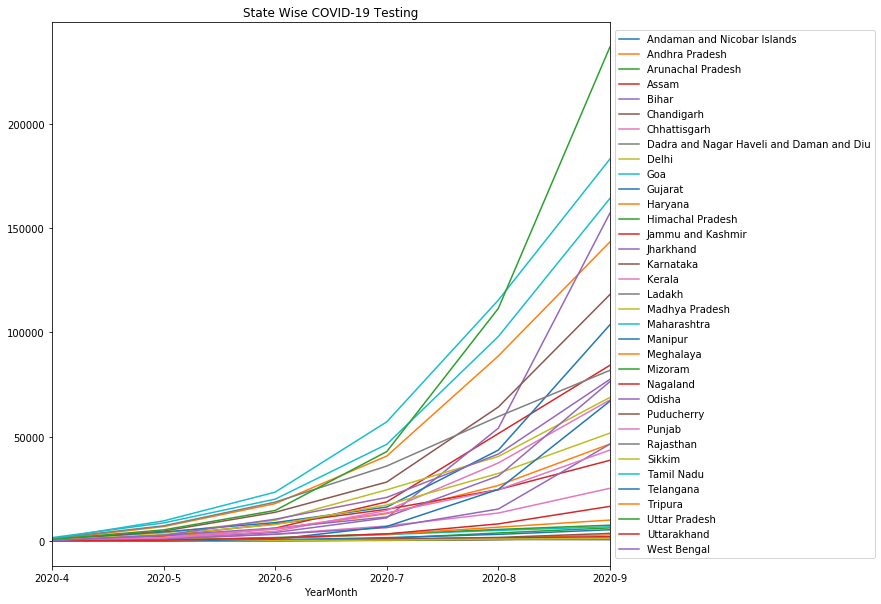

In [13]:
#Creating line chart for state wise testing
(df/1000).sort_index(ascending=True).plot.line(figsize=(10, 10),title = "State Wise COVID-19 Testing" ,
                                                legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

From above plots we can see in Uttar Pradesh, Tamil Nadu and Maharashtra states are placed in top 3 in testing, Rest of states need to increase labs for testing.